[1033.33333333]
[1033.33333333]


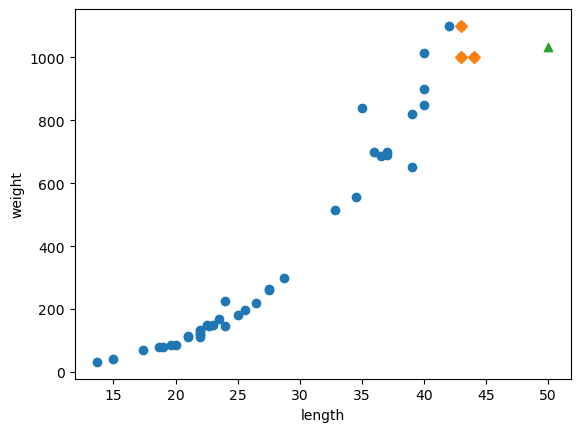

In [2]:
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)


print(knr.predict([[50]]))
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<h1>연습1) K-최근접 이웃의 한계와 100일때의 상황을 그래프로 나타내시오</h1>

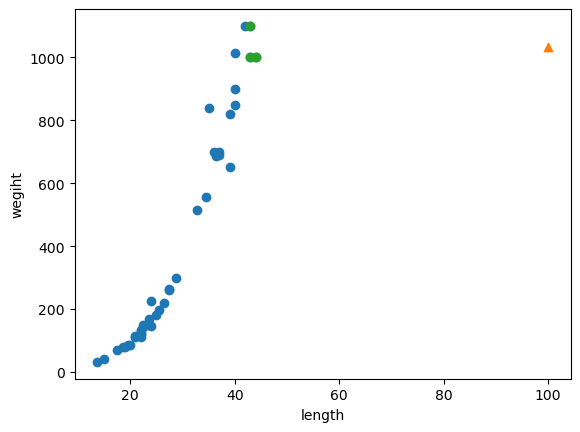

In [6]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input,train_target)
plt.scatter(100,knr.predict([[100]]),marker='^')
plt.scatter(train_input[indexes],train_target[indexes])
plt.xlabel('length')
plt.ylabel('wegiht')
plt.show()

<h1>연습2) 선형 회귀로 훈련시켜 보자.50cm에 대한 예측, 가중치,절편을 출력하고 선형회귀 그래프를 그려라</h1>

50cm 농어의 무게는? 1241.838603227962
기울기, 가중치: [39.01714496]
절편: -709.0186449535474


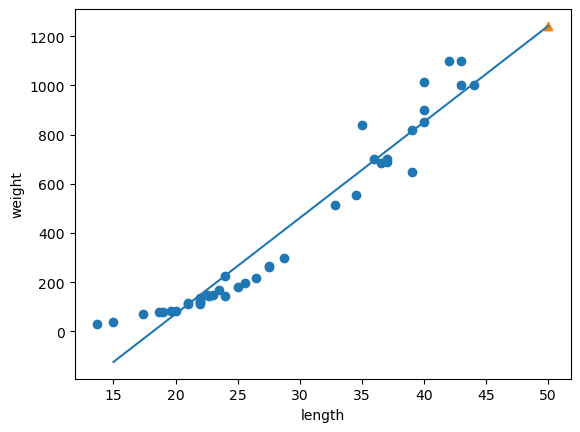

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_target)
prediction = lr.predict([[50]])
print(f'50cm 농어의 무게는? {prediction[0]}')
print(f'기울기, 가중치: {lr.coef_}')
print(f'절편: {lr.intercept_}')

plt.scatter(train_input,train_target)
plt.scatter(50,prediction,marker='^')
plt.plot([15,50], [lr.coef_*15+lr.intercept_, lr.coef_*50+lr.intercept_])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<h1>연습3) 농어의 길이로 무게를 예측할 때 선형 회귀가 적합하지 않은 이유는?</h1>

무게가 음수가 될 수 없다

<h1>연습4) 다항 회귀로 훈련시켜 보자.50cm에 대한 예측, 가중치,절편을 출력하고 선형회귀 그래프를 그려라</h1>

<h1> 2차 다항식을 이용항 회귀여서 (x^2, x) 이런 식으로 데이터를 제공해야 한다. 예측도 마찬가지. </h1>

In [17]:


train_poly = np.column_stack((train_input**2, train_input)) 
test_poly = np.column_stack((test_input**2, test_input))
print(train_input[:3])
print(train_poly[:3])

[[19.6]
 [22. ]
 [18.7]]
[[384.16  19.6 ]
 [484.    22.  ]
 [349.69  18.7 ]]


In [23]:
# predict를 하기 위해서는 꼭 먼저 모델을 훈련시켜야 한다.
lr = LinearRegression()
lr.fit(train_poly,train_target)
prediction = lr.predict([[50**2, 50]])
print(prediction)

[1573.98423528]


In [24]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


In [ ]:
point = np.arange(15,50)
plt.scatter(train_input,train_target)
plt.scatter(point, lr.coef_[0] * point**2 + lr.coef_[1] * point + lr.intercept_)